In [13]:
import pandas as pd
import functools
import matplotlib.pyplot as plt

In [3]:
survey = pd.read_csv("survey_results_public.csv")

In [7]:
jobHunters = survey[survey['NEWJobHunt'].notna()]
jobHunters['NEWJobHunt']

3        Curious about other opportunities;Wanting to w...
6        Better compensation;Growth or leadership oppor...
7        Curious about other opportunities;Better compe...
8        Curious about other opportunities;Growth or le...
9        Curious about other opportunities;Better compe...
                               ...                        
64111                                  Better compensation
64146                            Trouble with my teammates
64148    Having a bad day (or week or month) at work;Cu...
64152    Curious about other opportunities;Better compe...
64153    Curious about other opportunities;Better compe...
Name: NEWJobHunt, Length: 42286, dtype: object

In [9]:
#Going to split each value by semi colons 
def splitter(value):
    valuesList = value.split(';')
    return valuesList
jobHunters['REASONS'] = jobHunters['NEWJobHunt'].apply(splitter)

/tmp/ipykernel_12/3602230688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobHunters['REASONS'] = jobHunters['NEWJobHunt'].apply(splitter)


In [10]:
jobHunters['REASONS']

3        [Curious about other opportunities, Wanting to...
6        [Better compensation, Growth or leadership opp...
7        [Curious about other opportunities, Better com...
8        [Curious about other opportunities, Growth or ...
9        [Curious about other opportunities, Better com...
                               ...                        
64111                                [Better compensation]
64146                          [Trouble with my teammates]
64148    [Having a bad day (or week or month) at work, ...
64152    [Curious about other opportunities, Better com...
64153    [Curious about other opportunities, Better com...
Name: REASONS, Length: 42286, dtype: object

In [42]:
#counting amount of rows with each option
options = []
amounts = []

#fucntion to count the numebr of occurrences of all values found
def proportions(value):
    
    #looping through the list made for each row
    for option in value:
        
        #if option is already in the list jsut add to a the corresponding amount
        if option in options:
            amounts[options.index(option)] = amounts[options.index(option)] + 1
            
        #if the option is not in add it to the options list and give it an amount slot
        else:
            options.append(option)
            amounts.append(1)

jobHunters['REASONS'].apply(proportions)
print(options)
print(amounts)

['Curious about other opportunities', 'Wanting to work with new technologies', 'Better compensation', 'Growth or leadership opportunities', 'Trouble with my direct manager', 'Trouble with leadership at my company', 'Better work/life balance', 'Looking to relocate', 'Having a bad day (or week or month) at work', 'Wanting to share accomplishments with a wider network', 'Trouble with my teammates', 'Just because']
[24164, 24747, 29581, 22388, 7192, 11331, 20408, 11116, 8579, 4354, 4931, 5214]


<function matplotlib.pyplot.show(close=None, block=None)>

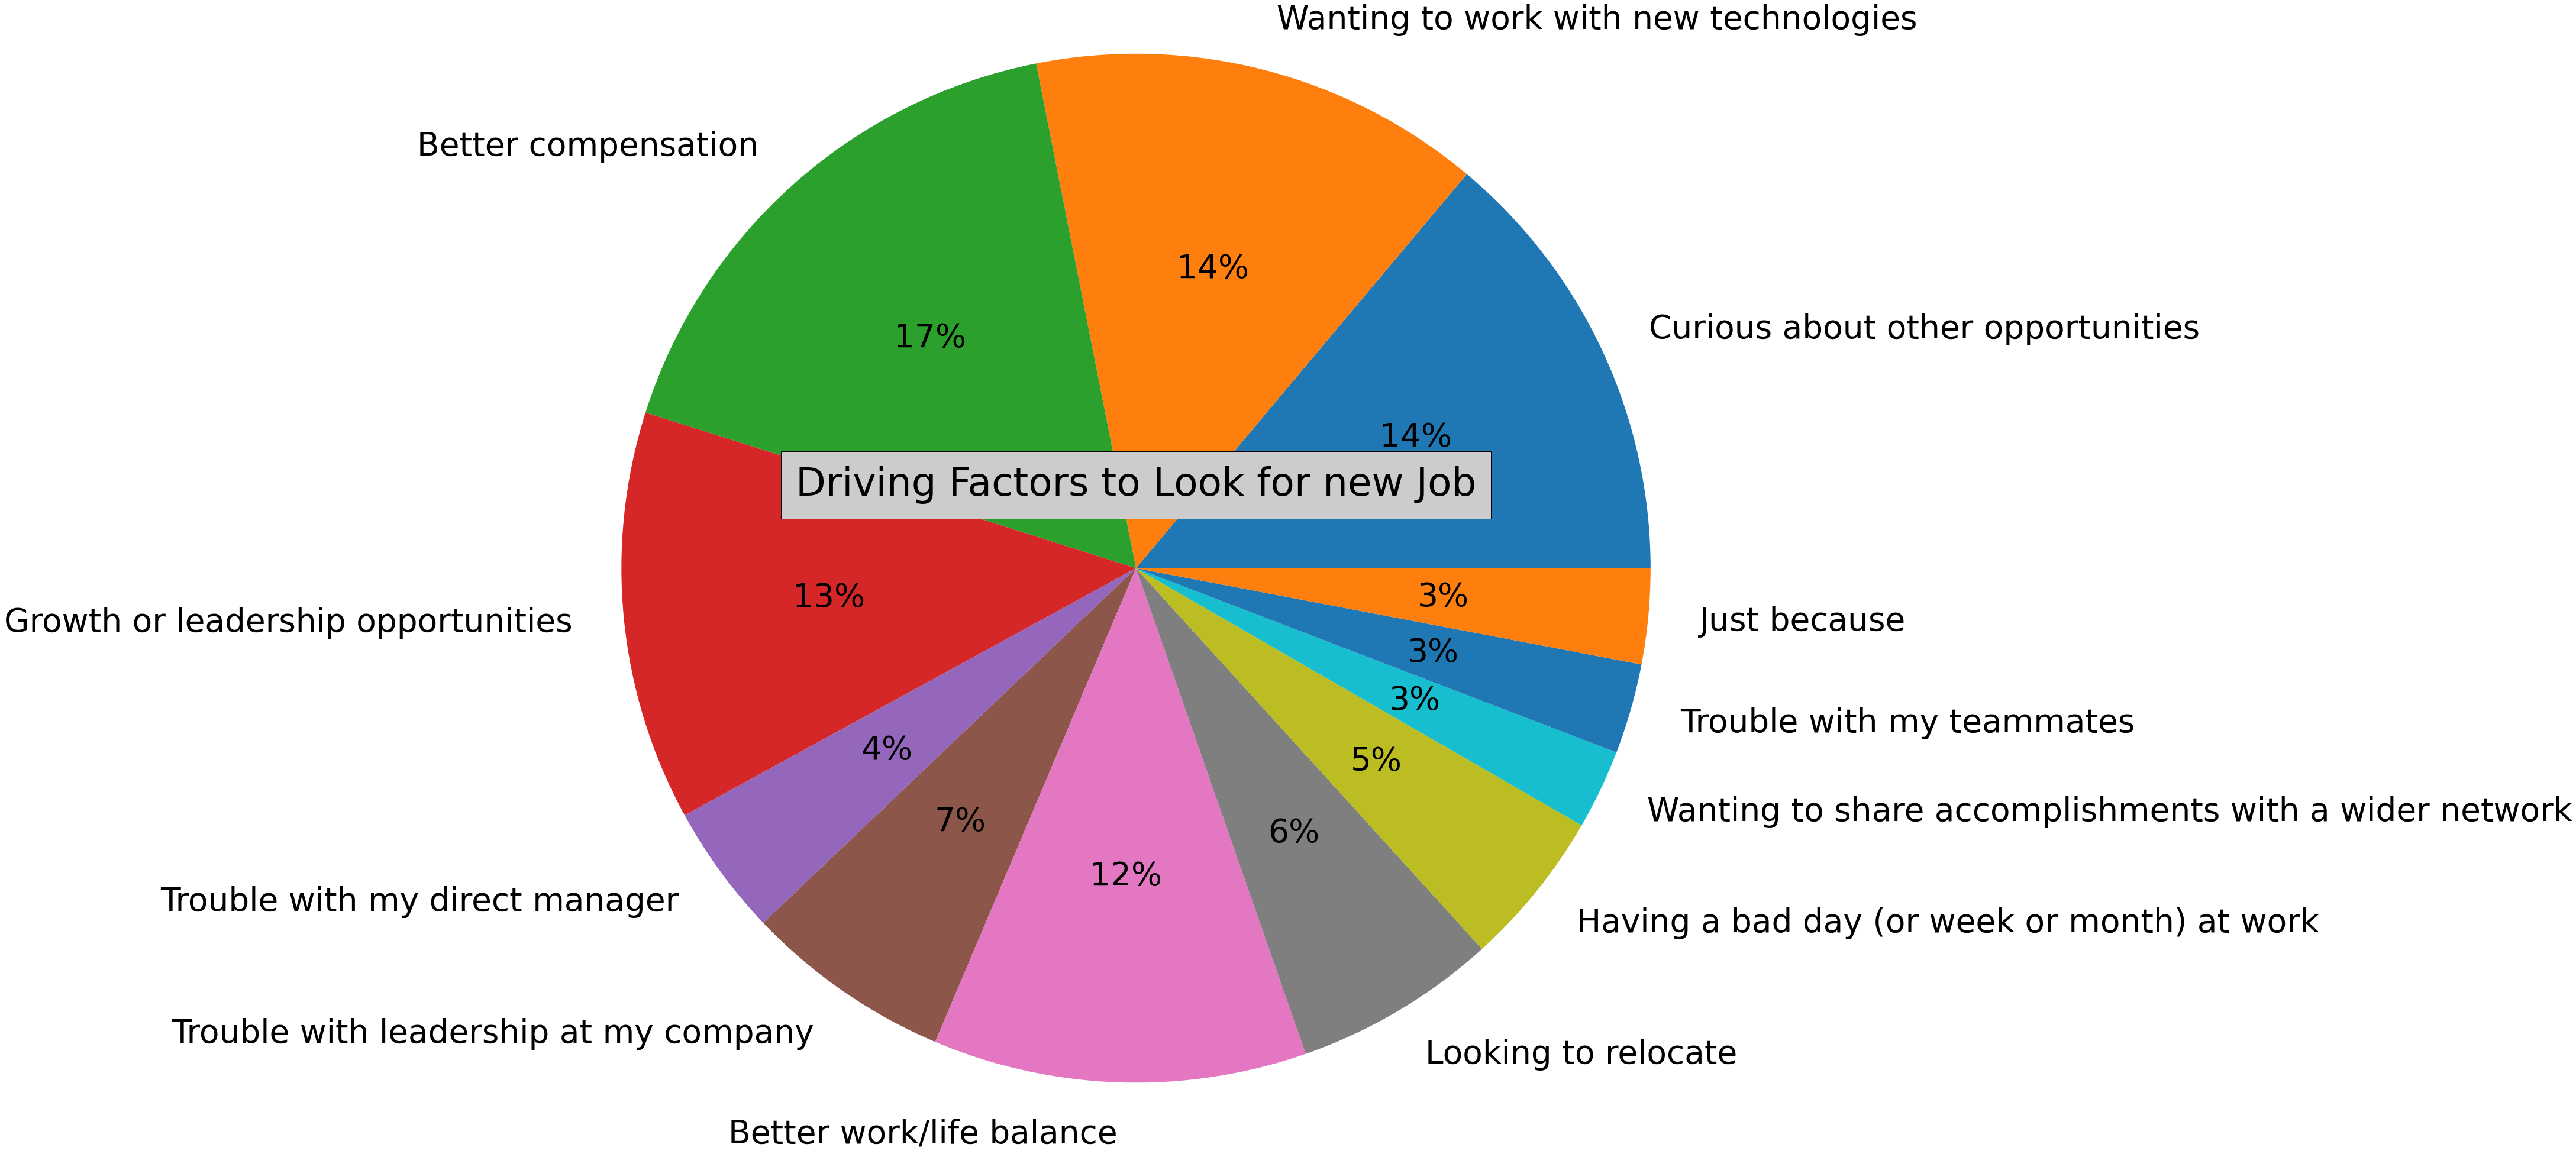

In [43]:
#plotting values in pie chart
plt.pie(amounts, labels = options, radius = 10, autopct='%.0f%%')
plt.rcParams.update({'font.size': 55})
plt.title("Driving Factors to Look for new Job", bbox={'facecolor':'0.8', 'pad':25})
plt.show

From the pie chart we can see that the biggest driving factors for developers to look for a new job are; better pay, and in general new opportunities. 
We can infer from this that any developers are looking to expand their skills, and want to learn new and modern technologies. Companies that have developers working on uninteresting or outdated frameworks or projects are most likely unable to keep their develoeprs for long. And of course, pay seems to be the largest factor. Developers in many sectors carry their ccompanies product or service, and needed to be paid accordingly. In the competitive job market of developers, it gets increasingly harder for smaller scale companies to compete with the compensation given by big tech companies, making ti harder to acquire developers for their needs.

In [44]:
#Now going to look into which factors impact a developers decision 
#between 2 companies with same comp and benifits and location

factorDevs = survey[survey['JobFactors'].notna()]

factorDevs['JobFactors']

0        Languages, frameworks, and other technologies ...
3        Flex time or a flexible schedule;Office enviro...
5        Diversity of the company or organization;Langu...
7        Remote work options;Opportunities for professi...
8        Diversity of the company or organization;Remot...
                               ...                        
64146    Specific department or team I’d be working on;...
64148    Industry that I’d be working in;Languages, fra...
64150    Flex time or a flexible schedule;Languages, fr...
64152    Flex time or a flexible schedule;Languages, fr...
64153    Languages, frameworks, and other technologies ...
Name: JobFactors, Length: 49349, dtype: object

In [45]:
#Splitting values from factors into easy to use list
factorDevs['FACTORS'] = factorDevs['JobFactors'].apply(lambda x: x.split(';'))


#Calculating amount of selections per option
options = []
amounts = []

factorDevs['FACTORS'].apply(proportions)
print(options)
print(amounts)

['Languages, frameworks, and other technologies I’d be working with', 'Remote work options', 'Opportunities for professional development', 'Flex time or a flexible schedule', 'Office environment or company culture', 'Diversity of the company or organization', 'Family friendliness', 'How widely used or impactful my work output would be', 'Industry that I’d be working in', 'Financial performance or funding status of the company or organization', 'Specific department or team I’d be working on']
[25334, 16411, 20421, 21656, 21981, 3387, 5986, 10277, 7574, 5892, 5805]


/tmp/ipykernel_12/487622858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factorDevs['FACTORS'] = factorDevs['JobFactors'].apply(lambda x: x.split(';'))


<function matplotlib.pyplot.show(close=None, block=None)>

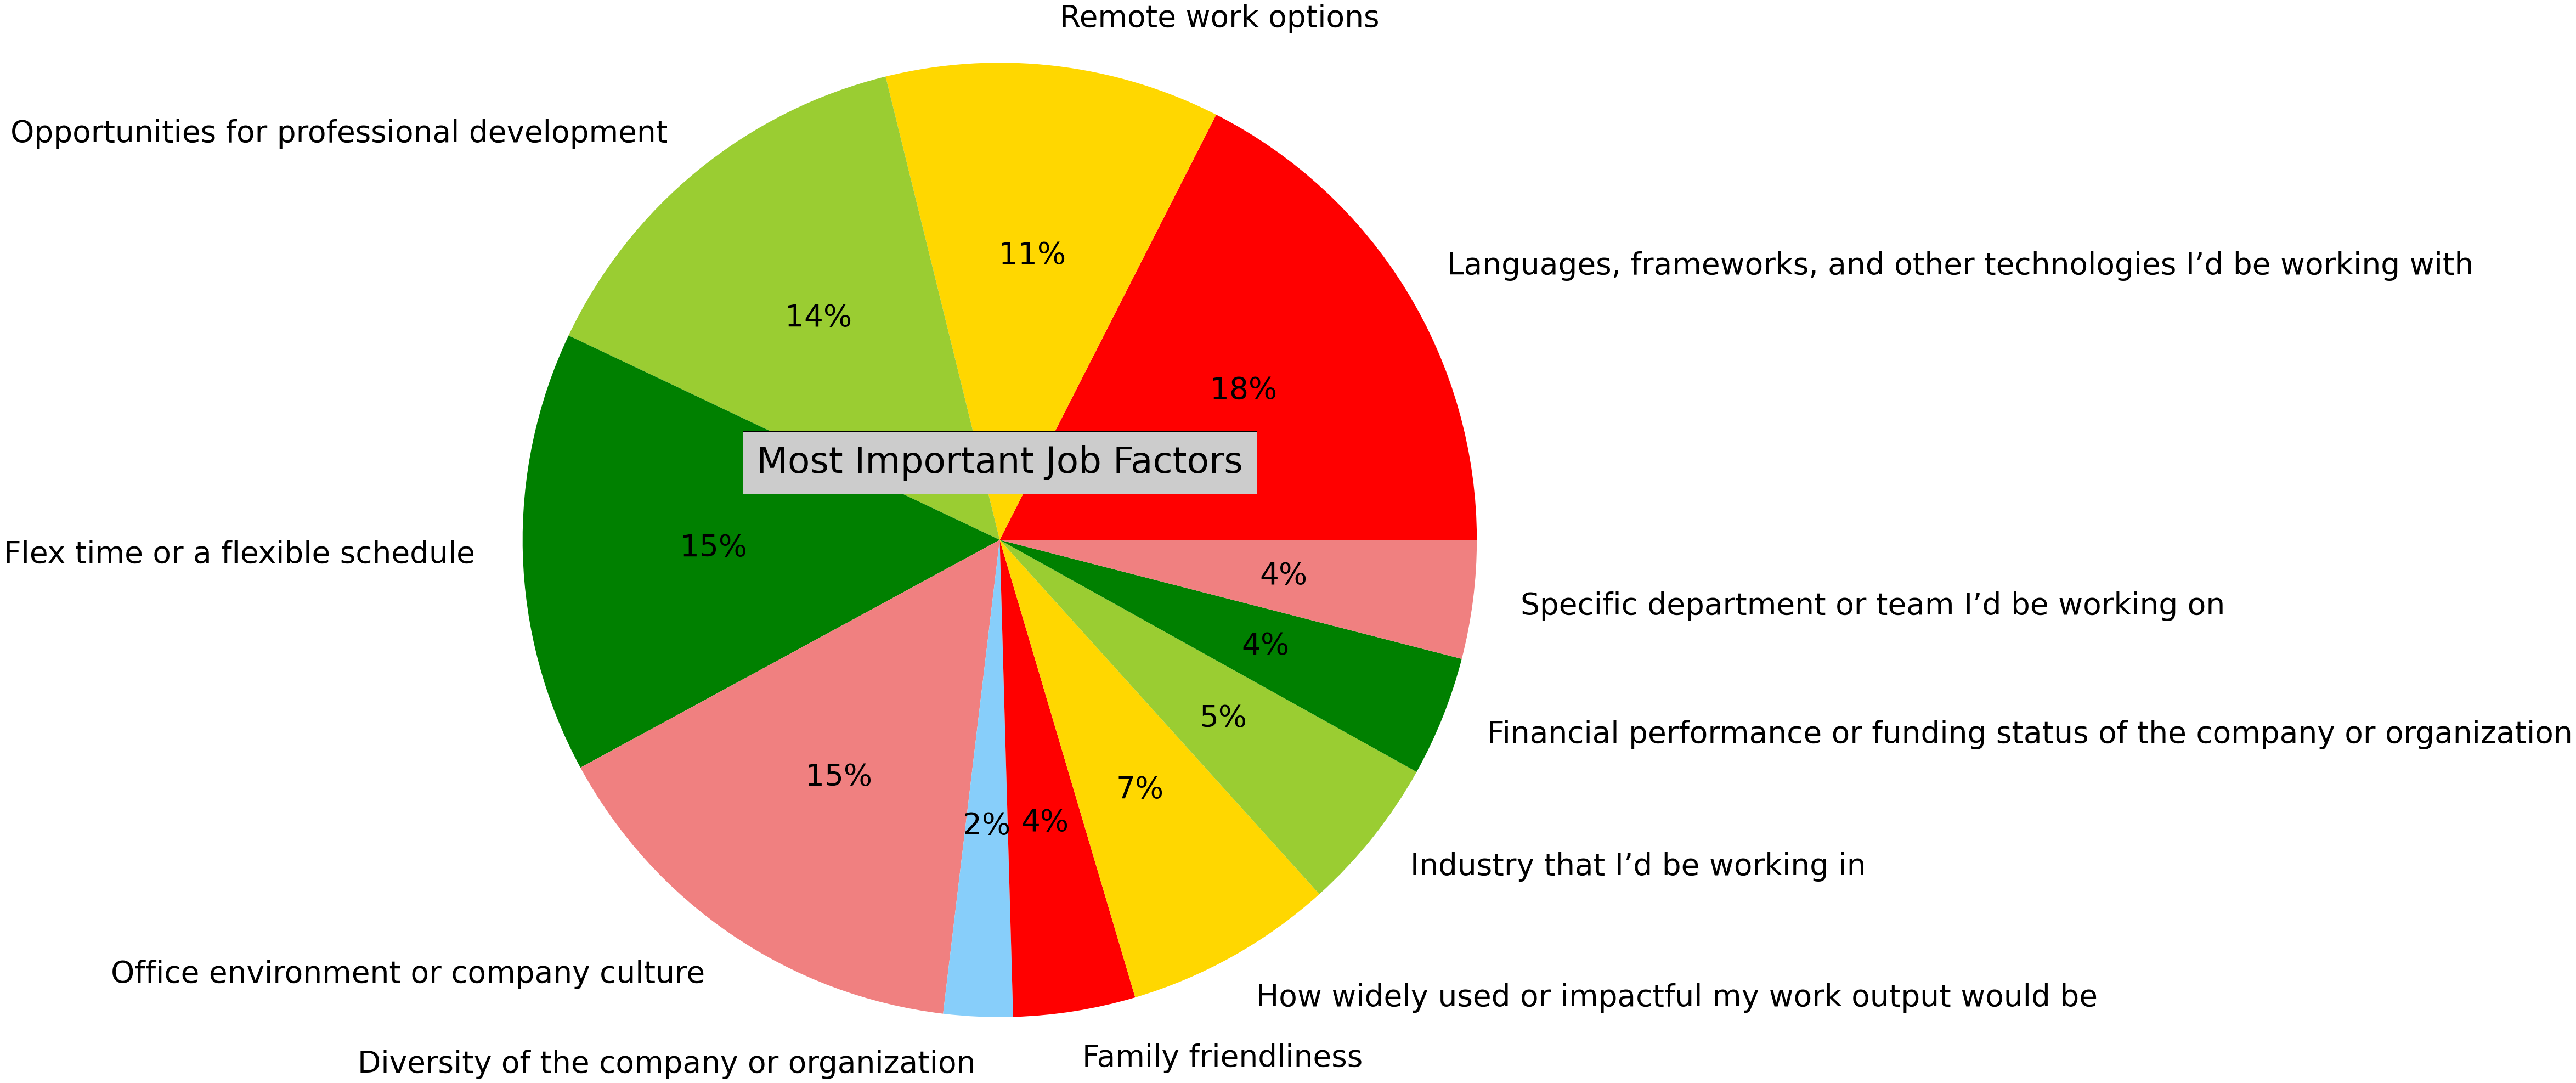

In [48]:
#Plotting Factors values
colorOption = ['red', 'gold', 'yellowgreen', 'green', 'lightcoral', 'lightskyblue']
plt.pie(amounts, labels = options, radius = 10, autopct='%.0f%%',colors = colorOption )
plt.rcParams.update({'font.size': 55})
plt.title("Most Important Job Factors", bbox={'facecolor':'0.8', 'pad':25})
plt.show

We can see and confirm from this graph the findings in the previous pie chart. We see that when compensation is
taken out of the argument, the biggest factor developers look into when looking at jobs would be the technologies
worked with, and the flexibility of the position, looking into things like flex time, and remote work. Company culture is also as we see in the graph, but logically speaking it also ties into the flexibility of the position, and the oppurtunities for growth. Company culture can dictate how the professional progression goes for its employees. For example could put heavier value on technical skills as opposed to soft skills, and that would decide wether a person whose analytically or socially smart progresses in said company.

All in all we can see that the biggest thing that motivates developers to work for a certain position is the pay, and theirt ability to progress in that role. The tech industry is an ever evolving field, so it makes sence that developers would put great value into their own personal development.